In [1]:
import sys, os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import h5py 
import math
#from collections import deque, Counter
#from joblib import Memory
# from joblib import Parallel, delayed
from IPython import embed as shell

np.set_printoptions(suppress=True) ## suppress scientific notation!
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

matplotlib.use('TkAgg')
matplotlib.rcParams['pdf.fonttype'] = 42 ## so that you can edit the label in adobe illustrator
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
def dec_to_bin_array(d, bits=None, bit_order='<'):
    # No need for axis argument: just put newaxis on end,
    # and can transpose later if needed
    
    # Convert to numpy array if needed
    if not isinstance(d, np.ndarray):
        d = np.array([d])
    
    # Calculate minimum bits to represent integer
    min_bits = np.max(np.ceil(np.log2(np.maximum(d, np.ones(d.shape))))).astype(np.int64)
    if bits is None:
        bits = min_bits
    elif bits < min_bits:
        raise ValueError('Not enough bits to represent number. At least %d bits required.' % min_bits)
    
    # Broadcast binary representation to new axis at end
    b = np.zeros(list(d.shape) + [bits], dtype=np.int16)
    rem = d
    bit = bits
    while (bit > 0) and (rem > 0).any():
        bit -= 1
        b[..., bit] = (rem >= 2**bit)
        rem = rem % 2**bit
    
    # Return binary representation
    if bit_order == '<':
        return b
    elif bit_order == '>':
        return b[..., ::-1]
    else:
        raise ValueError('Unknown bit order \'%s\'' % bit_order)

In [3]:
## load data
datadirs = ['C:/Users/ubcsi/Desktop/NAVR/Data/V1B4/18/',
            'D:/Siboo/matlab_data/K1_series/',
            'C:/Users/Station_Lab/Desktop/Sibo/Matlab_data/K1_series/',
            '/home/sibo/Desktop/NAVR/Data/smallest_data/',
            'D:/sibo/codes/converted_matlab/k1a2/']

fileroot = next( (dir for dir in datadirs if os.path.isdir(dir)), None)

In [4]:
f1 = fileroot+"DataLog.csv"
# f2 = fileroot+"Log2019-08-22 1503.txt"
# f3 = fileroot+"Log2019-08-30 1311.txt"
# f4 = fileroot+"mergedLog43.txt"

In [5]:
# open file:
data = pd.read_csv(f1, sep=",", header=None)
data.columns = ["Mastertime", "GPIO", "Encoder", "UnwrappedEncoder", "last_ts"]
# unpack into np.arrays
UnwrappedEncoder = np.array(data['UnwrappedEncoder'])
GPIO = np.array(data['GPIO'])
last_ts = np.array(data['last_ts'])

## TO DO: read from params.json file
zonedistance = 20 #cm

# constant    
TrackDistance = zonedistance * 8
d = 20.2 # cm

# extract wheel data, motor data, and lick data
linear_pos = (UnwrappedEncoder - UnwrappedEncoder[0]) * d /8192 * np.pi 
wheeltime = last_ts - last_ts[0]
linear_pos_wrap = linear_pos % TrackDistance

## get motor and lick
gpio_array = dec_to_bin_array(GPIO, bits = 16)
motor_idx = np.array(np.where(np.diff(gpio_array[:,4]) ==1)[0]) +1  # 5th bit for reward
motor_times = wheeltime[motor_idx]
motor_pos = linear_pos[motor_idx]
motor_pos_wrap = motor_pos % TrackDistance

lick_idx = np.array(np.where(np.diff(gpio_array[:,2]) ==1)[0]) +1  # 3th bit for lick
lick_times = wheeltime[lick_idx]
lick_pos = linear_pos[lick_idx]
lick_pos_wrap = lick_pos % TrackDistance

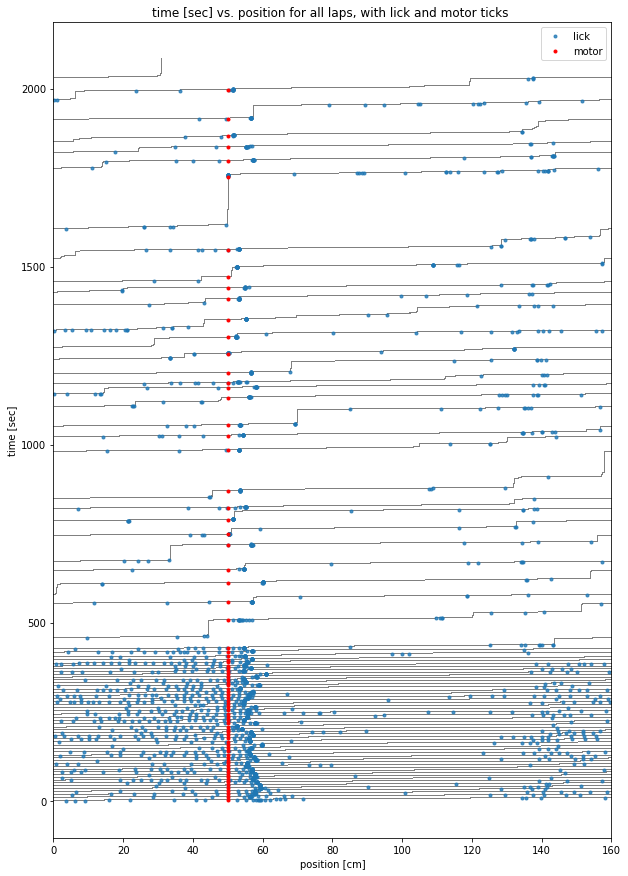

In [80]:
fig = plt.figure(figsize=(10,15));
plt.plot(linear_pos_wrap, wheeltime, ',', c = 'grey' )
plt.plot(lick_pos_wrap,lick_times, '.', alpha = 0.8, label = 'lick')
plt.plot(motor_pos_wrap,motor_times, 'r.', alpha = 1, label = 'motor')
plt.title('time [sec] vs. position for all laps, with lick and motor ticks ')
plt.xlabel('position [cm]')
plt.ylabel('time [sec]')
plt.xlim(0,TrackDistance)
plt.legend()

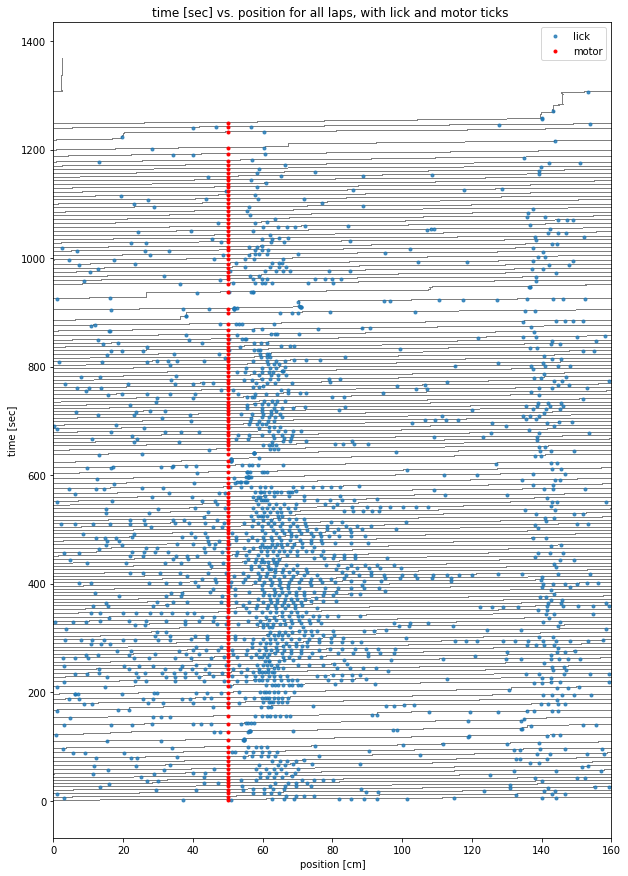

In [99]:
fig = plt.figure(figsize=(10,15));
plt.plot(linear_pos_wrap, wheeltime, ',', c = 'grey' )
plt.plot(lick_pos_wrap,lick_times, '.', alpha = 0.8, label = 'lick')
plt.plot(motor_pos_wrap,motor_times, 'r.', alpha = 1, label = 'motor')
plt.title('time [sec] vs. position for all laps, with lick and motor ticks ')
plt.xlabel('position [cm]')
plt.ylabel('time [sec]')
plt.xlim(0,TrackDistance)
plt.legend()

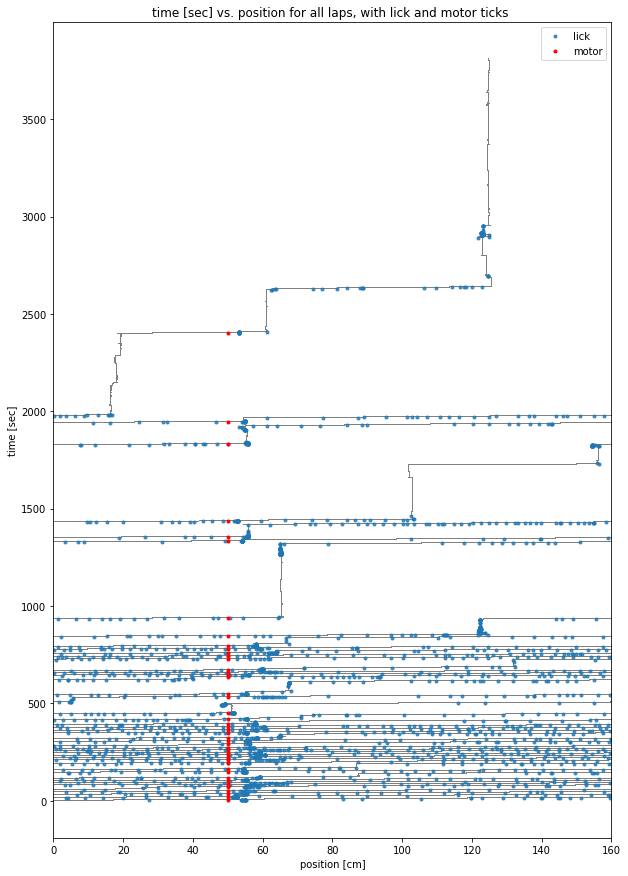

In [6]:
fig = plt.figure(figsize=(10,15));
plt.plot(linear_pos_wrap, wheeltime, ',', c = 'grey' )
plt.plot(lick_pos_wrap,lick_times, '.', alpha = 0.8, label = 'lick')
plt.plot(motor_pos_wrap,motor_times, 'r.', alpha = 1, label = 'motor')
plt.title('time [sec] vs. position for all laps, with lick and motor ticks ')
plt.xlabel('position [cm]')
plt.ylabel('time [sec]')
plt.xlim(0,TrackDistance)
plt.legend()